Ring Polymer Melt
===========

insert description

### Concepts Used
- blergh

### Tools Used
- blergh

References
-----------
 
  

Global Imports and Setup
----------------------------


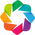

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import numpy as np
import holoviews as hv
hv.extension('bokeh')

%load_ext autoreload
%autoreload 2

In [4]:
%opts Curve Scatter [width=500,height=400] Layout [shared_axes=False] Scatter (size=10,alpha=0.5)
%opts Curve Scatter [fontsize={'xlabel':14,'xlabel':14,'ylabel':14,'ticks':12}]
%opts Overlay [legend_position='bottom_left']
%opts Layout [shared_axes=False]


colors = {}
colors[2000] = 'blue'
colors[500] = 'red'
colors[100] = 'green'

ls = {}
ls[2000] = 'solid'
ls[500] = 'dashed'
ls[100] = 'dotted'

markers = {}
markers[2000] = 'o'
markers[500] = '^'
markers[100] = 'd'

Demo
-----

Now we do the PRISM calculation...

In [12]:
import typyPRISM
from typyPRISM.calculate.prism.pair_correlation import pair_correlation


dA = 1.0
dB = 1.0
vA = 4.0/3.0 * np.pi * (dA/2.0)**(3.0)
vB = 4.0/3.0 * np.pi * (dB/2.0)**(3.0)

eta = 0.3
phi = 0.5
rhoA = phi * eta/vA
rhoB = (1-phi) * eta/vA

lengthA = 2000
lengthB = 2000

sys = typyPRISM.System(['A','B'],kT=1.0)
sys.domain = typyPRISM.Domain(dr=0.05,length=2048)

sys.density['A'] = rhoA
sys.density['B'] = rhoB

sys.closure['A','A'] = typyPRISM.closure.PercusYevick()
sys.closure['A','B'] = typyPRISM.closure.PercusYevick()
sys.closure['B','B'] = typyPRISM.closure.PercusYevick()

sys.potential['A','A'] = typyPRISM.potential.HardSphere(sigma=dA)
sys.potential['A','B'] = typyPRISM.potential.HardCoreLennardJones(sigma=(dA+dB)/2.0,epsilon=-0.1)
# sys.potential['A','B'] = typyPRISM.potential.HardSphere(sigma=(dA+dB)/2.0)
sys.potential['B','B'] = typyPRISM.potential.HardSphere(sigma=dB)

sys.omega['A','A'] = typyPRISM.omega.GaussianRing(sigma=1.0,length=lengthA)
sys.omega['A','B'] = typyPRISM.omega.InterMolecular()
sys.omega['B','B'] = typyPRISM.omega.GaussianRing(sigma=1.0,length=lengthB)

PRISM = sys.createPRISM()

result = PRISM.solve()


0:  |F(x)| = 278.172; step 1; tol 0.168578
1:  |F(x)| = 145.457; step 1; tol 0.246086
2:  |F(x)| = 46.0085; step 1; tol 0.0900425
3:  |F(x)| = 45.7137; step 0.00602047; tol 0.888505
4:  |F(x)| = 34.7868; step 1; tol 0.710497
5:  |F(x)| = 21.2456; step 1; tol 0.454326
6:  |F(x)| = 19.9434; step 0.0798933; tol 0.79306
7:  |F(x)| = 17.7285; step 0.16835; tol 0.711192
8:  |F(x)| = 14.3337; step 0.46336; tol 0.588324
9:  |F(x)| = 2268.96; step 1; tol 0.9999
10:  |F(x)| = 2186.13; step 1; tol 0.89982
11:  |F(x)| = 1114.57; step 1; tol 0.728708
12:  |F(x)| = 571.402; step 1; tol 0.477914
13:  |F(x)| = 333.133; step 1; tol 0.30591
14:  |F(x)| = 238.614; step 1; tol 0.461743
15:  |F(x)| = 238.587; step 0.000314082; tol 0.899791
16:  |F(x)| = 493.93; step 1; tol 0.9999
17:  |F(x)| = 493.93; step 7.20851e-08; tol 0.9
18:  |F(x)| = 349.27; step 1; tol 0.729
19:  |F(x)| = 270.557; step 1; tol 0.540055
20:  |F(x)| = 244.543; step 0.115181; tol 0.735251
21:  |F(x)| = 180.419; step 1; tol 0.489886
22:

161:  |F(x)| = 22.0299; step 0.00321272; tol 0.898615
162:  |F(x)| = 21.7546; step 0.157398; tol 0.87765
163:  |F(x)| = 21.6993; step 0.0230813; tol 0.895427
164:  |F(x)| = 21.471; step 0.119581; tol 0.881159
165:  |F(x)| = 21.4492; step 0.00735492; tol 0.898171
166:  |F(x)| = 21.4272; step 0.00777452; tol 0.898159
167:  |F(x)| = 21.4237; step 0.0149645; tol 0.899706
168:  |F(x)| = 21.4049; step 0.00509957; tol 0.898421
169:  |F(x)| = 21.4048; step 2.48823e-05; tol 0.899991
170:  |F(x)| = 21.3236; step 0.0243617; tol 0.893183
171:  |F(x)| = 19.7206; step 1; tol 0.769772
172:  |F(x)| = 19.5611; step 0.00944471; tol 0.885501
173:  |F(x)| = 19.3427; step 0.0122539; tol 0.880017
174:  |F(x)| = 19.0882; step 0.0144413; tol 0.87647
175:  |F(x)| = 18.7936; step 0.0171766; tol 0.872436
176:  |F(x)| = 18.5106; step 0.0176492; tol 0.8731
177:  |F(x)| = 18.2795; step 0.0161681; tol 0.877666
178:  |F(x)| = 18.1711; step 0.00928912; tol 0.889358
179:  |F(x)| = 18.0326; step 0.0248142; tol 0.886327


315:  |F(x)| = 10.1209; step 0.0013168; tol 0.899515
316:  |F(x)| = 10.1176; step 0.00173913; tol 0.899405
317:  |F(x)| = 10.1121; step 0.00320317; tol 0.899029
318:  |F(x)| = 10.1059; step 0.00356926; tol 0.898884
319:  |F(x)| = 10.104; step 0.000934844; tol 0.899674
320:  |F(x)| = 10.1026; step 0.000738826; tol 0.899737
321:  |F(x)| = 10.1026; step 3.52005e-07; tol 0.9
322:  |F(x)| = 10.1024; step 6.21047e-05; tol 0.899978
323:  |F(x)| = 10.102; step 0.000200691; tol 0.89993
324:  |F(x)| = 10.102; step 2.66016e-05; tol 0.899991
325:  |F(x)| = 10.096; step 0.00333551; tol 0.898926
326:  |F(x)| = 10.0941; step 0.000964902; tol 0.899676
327:  |F(x)| = 10.0918; step 0.00123119; tol 0.899586
328:  |F(x)| = 10.0875; step 0.00218794; tol 0.899232
329:  |F(x)| = 10.0819; step 0.00316212; tol 0.899006
330:  |F(x)| = 10.0772; step 0.00230126; tol 0.899151
331:  |F(x)| = 10.0737; step 0.00169323; tol 0.899377
332:  |F(x)| = 10.0704; step 0.00160639; tol 0.899405
333:  |F(x)| = 10.0702; step 9.5

467:  |F(x)| = 8.63329; step 0.0025742; tol 0.898994
468:  |F(x)| = 8.62949; step 0.00168684; tol 0.899207
469:  |F(x)| = 8.61924; step 0.00637691; tol 0.897863
470:  |F(x)| = 8.61668; step 0.00140369; tol 0.899465
471:  |F(x)| = 8.60388; step 0.00761641; tol 0.89733
472:  |F(x)| = 8.60387; step 5.5712e-06; tol 0.899998
473:  |F(x)| = 8.60387; step 1.63785e-06; tol 0.899999
474:  |F(x)| = 8.60302; step 0.000485249; tol 0.899822
475:  |F(x)| = 8.59967; step 0.00187541; tol 0.899298
476:  |F(x)| = 8.59967; step 2.56263e-08; tol 0.9
477:  |F(x)| = 8.59514; step 0.00264182; tol 0.899054
478:  |F(x)| = 8.58271; step 0.00779208; tol 0.897398
479:  |F(x)| = 8.5793; step 0.00177004; tol 0.899285
480:  |F(x)| = 8.57929; step 2.61117e-06; tol 0.899999
481:  |F(x)| = 8.57929; step 1.9115e-07; tol 0.9
482:  |F(x)| = 8.55867; step 0.0133523; tol 0.895678
483:  |F(x)| = 8.55438; step 0.00226727; tol 0.899097
484:  |F(x)| = 8.55075; step 0.00193783; tol 0.899236
485:  |F(x)| = 8.5442; step 0.00401587

619:  |F(x)| = 8.24389; step 0.000200594; tol 0.899932
620:  |F(x)| = 8.24384; step 3.3932e-05; tol 0.899988
621:  |F(x)| = 8.2438; step 2.47637e-05; tol 0.899992
622:  |F(x)| = 8.24374; step 3.74245e-05; tol 0.899987
623:  |F(x)| = 8.24356; step 0.00011479; tol 0.899961
624:  |F(x)| = 8.24346; step 6.74181e-05; tol 0.899977
625:  |F(x)| = 8.24339; step 4.48337e-05; tol 0.899985
626:  |F(x)| = 8.24339; step 7.16835e-07; tol 0.9
627:  |F(x)| = 8.24329; step 6.28738e-05; tol 0.899978
628:  |F(x)| = 8.24304; step 0.000156934; tol 0.899947
629:  |F(x)| = 8.24293; step 7.1724e-05; tol 0.899975
630:  |F(x)| = 8.24266; step 0.0001732; tol 0.899941
631:  |F(x)| = 8.24048; step 0.000675464; tol 0.899523
632:  |F(x)| = 8.23932; step 0.00106904; tol 0.899748
633:  |F(x)| = 8.23591; step 0.00229758; tol 0.899255
634:  |F(x)| = 8.23231; step 0.00244107; tol 0.899212
635:  |F(x)| = 8.22869; step 0.00251176; tol 0.89921
636:  |F(x)| = 8.22566; step 0.00204469; tol 0.899336
637:  |F(x)| = 8.22268; ste

771:  |F(x)| = 7.87388; step 3.11851e-07; tol 0.9
772:  |F(x)| = 7.87384; step 2.74648e-05; tol 0.899991
773:  |F(x)| = 7.87378; step 3.93723e-05; tol 0.899986
774:  |F(x)| = 7.87372; step 3.96395e-05; tol 0.899986
775:  |F(x)| = 7.87372; step 4.5376e-09; tol 0.9
776:  |F(x)| = 7.87364; step 5.44055e-05; tol 0.899981
777:  |F(x)| = 7.87337; step 0.000175154; tol 0.89994
778:  |F(x)| = 7.87337; step 1.45667e-06; tol 0.899999
779:  |F(x)| = 7.87331; step 4.38257e-05; tol 0.899985
780:  |F(x)| = 7.87318; step 8.22226e-05; tol 0.899972
781:  |F(x)| = 7.87305; step 8.61728e-05; tol 0.89997
782:  |F(x)| = 7.8729; step 0.000100123; tol 0.899966
783:  |F(x)| = 7.87284; step 3.99155e-05; tol 0.899986
784:  |F(x)| = 7.87179; step 0.000715383; tol 0.899759
785:  |F(x)| = 7.87176; step 2.15136e-05; tol 0.899993
786:  |F(x)| = 7.87144; step 0.000212116; tol 0.899928
787:  |F(x)| = 7.87126; step 0.00012234; tol 0.899958
788:  |F(x)| = 7.87104; step 0.000145678; tol 0.89995
789:  |F(x)| = 7.87092; st

923:  |F(x)| = 7.86011; step 9.24045e-07; tol 0.9
924:  |F(x)| = 7.8601; step 1.98176e-06; tol 0.899999
925:  |F(x)| = 7.86008; step 1.52156e-05; tol 0.899995
926:  |F(x)| = 7.86007; step 1.0278e-05; tol 0.899996
927:  |F(x)| = 7.86005; step 1.1639e-05; tol 0.899996
928:  |F(x)| = 7.86002; step 1.60517e-05; tol 0.899994
929:  |F(x)| = 7.86002; step 3.55319e-07; tol 0.9
930:  |F(x)| = 7.86002; step 4.05283e-06; tol 0.899999
931:  |F(x)| = 7.86001; step 6.7681e-06; tol 0.899998
932:  |F(x)| = 7.86; step 7.00432e-06; tol 0.899998
933:  |F(x)| = 7.85999; step 3.06455e-06; tol 0.899999
934:  |F(x)| = 7.85999; step 4.19932e-07; tol 0.9
935:  |F(x)| = 7.85998; step 9.81547e-06; tol 0.899997
936:  |F(x)| = 7.85995; step 1.54507e-05; tol 0.899995
937:  |F(x)| = 7.85993; step 1.72792e-05; tol 0.899994
938:  |F(x)| = 7.85989; step 2.18663e-05; tol 0.899993
939:  |F(x)| = 7.85989; step 1.48906e-06; tol 0.899999
940:  |F(x)| = 7.85988; step 7.43629e-06; tol 0.899997
941:  |F(x)| = 7.85988; step 3.5

1073:  |F(x)| = 7.72124; step 0.00122565; tol 0.89959
1074:  |F(x)| = 7.72122; step 1.36083e-05; tol 0.899995
1075:  |F(x)| = 7.72118; step 2.42315e-05; tol 0.899991
1076:  |F(x)| = 7.71774; step 0.002284; tol 0.899199
1077:  |F(x)| = 7.71718; step 0.000351812; tol 0.899869
1078:  |F(x)| = 7.7166; step 0.00036465; tol 0.899864
1079:  |F(x)| = 7.71026; step 0.0044018; tol 0.898522
1080:  |F(x)| = 7.6983; step 0.00857168; tol 0.897209
1081:  |F(x)| = 7.69345; step 0.00318914; tol 0.898868
1082:  |F(x)| = 7.68632; step 0.00483295; tol 0.898331
1083:  |F(x)| = 7.68269; step 0.00239957; tol 0.89915
1084:  |F(x)| = 7.67738; step 0.00357922; tol 0.898757
1085:  |F(x)| = 7.66962; step 0.00536961; tol 0.898182
1086:  |F(x)| = 7.65865; step 0.00781675; tol 0.897427
1087:  |F(x)| = 7.65236; step 0.00439922; tol 0.898522
1088:  |F(x)| = 7.64498; step 0.00524456; tol 0.898265
1089:  |F(x)| = 7.63664; step 0.00601194; tol 0.898037
1090:  |F(x)| = 7.63097; step 0.0025663; tol 0.898665
1091:  |F(x)| =

1222:  |F(x)| = 7.53941; step 6.28027e-06; tol 0.899998
1223:  |F(x)| = 7.53941; step 1.31178e-06; tol 0.9
1224:  |F(x)| = 7.53936; step 3.07385e-05; tol 0.899989
1225:  |F(x)| = 7.53926; step 7.19101e-05; tol 0.899975
1226:  |F(x)| = 7.53925; step 5.87856e-06; tol 0.899998
1227:  |F(x)| = 7.53925; step 9.50514e-07; tol 0.9
1228:  |F(x)| = 7.53923; step 1.72326e-05; tol 0.899994
1229:  |F(x)| = 7.53921; step 1.03379e-05; tol 0.899996
1230:  |F(x)| = 7.53919; step 1.6079e-05; tol 0.899994
1231:  |F(x)| = 7.53915; step 2.68864e-05; tol 0.899991
1232:  |F(x)| = 7.53913; step 1.1916e-05; tol 0.899996
1233:  |F(x)| = 7.53909; step 2.88998e-05; tol 0.89999
1234:  |F(x)| = 7.53905; step 2.67031e-05; tol 0.899991
1235:  |F(x)| = 7.53904; step 6.25823e-06; tol 0.899998
1236:  |F(x)| = 7.53902; step 1.71154e-05; tol 0.899994
1237:  |F(x)| = 7.53901; step 7.90377e-06; tol 0.899997
1238:  |F(x)| = 7.53897; step 2.82667e-05; tol 0.89999
1239:  |F(x)| = 7.53893; step 2.30104e-05; tol 0.899992
1240: 

1372:  |F(x)| = 6.42861; step 0.0582171; tol 0.872006
1373:  |F(x)| = 6.29031; step 0.118485; tol 0.861692
1374:  |F(x)| = 6.25505; step 0.0247967; tol 0.889939
1375:  |F(x)| = 6.21839; step 0.028134; tol 0.889481
1376:  |F(x)| = 6.18689; step 0.0284657; tol 0.890905
1377:  |F(x)| = 6.17275; step 0.0123226; tol 0.895891
1378:  |F(x)| = 6.15123; step 0.0166317; tol 0.893737
1379:  |F(x)| = 6.11069; step 0.0376741; tol 0.888175
1380:  |F(x)| = 6.07526; step 0.032313; tol 0.889595
1381:  |F(x)| = 6.05655; step 0.0150253; tol 0.894465
1382:  |F(x)| = 6.0361; step 0.0178744; tol 0.893933
1383:  |F(x)| = 6.01347; step 0.0201556; tol 0.893263
1384:  |F(x)| = 5.98873; step 0.0239832; tol 0.89261
1385:  |F(x)| = 5.96861; step 0.0185527; tol 0.893964
1386:  |F(x)| = 5.94599; step 0.022329; tol 0.89319
1387:  |F(x)| = 5.92412; step 0.021767; tol 0.893393
1388:  |F(x)| = 5.90422; step 0.0199599; tol 0.893964
1389:  |F(x)| = 5.87893; step 0.0210055; tol 0.892306
1390:  |F(x)| = 5.87753; step 0.0013

1526:  |F(x)| = 28.2328; step 0.000903955; tol 0.899641
1527:  |F(x)| = 28.2251; step 0.00126118; tol 0.899504
1528:  |F(x)| = 28.225; step 9.71571e-06; tol 0.899996
1529:  |F(x)| = 28.223; step 0.000296747; tol 0.899874
1530:  |F(x)| = 28.2145; step 0.00135069; tol 0.899454
1531:  |F(x)| = 28.2102; step 0.000678375; tol 0.899728
1532:  |F(x)| = 28.192; step 0.0032179; tol 0.898837
1533:  |F(x)| = 28.1762; step 0.00294148; tol 0.898992
1534:  |F(x)| = 28.1657; step 0.00167754; tol 0.89933
1535:  |F(x)| = 28.1654; step 4.03156e-05; tol 0.899984
1536:  |F(x)| = 28.1645; step 0.000161939; tol 0.899941
1537:  |F(x)| = 28.1625; step 0.000342914; tol 0.899875
1538:  |F(x)| = 28.1624; step 1.99999e-05; tol 0.899993
1539:  |F(x)| = 28.1624; step 9.70987e-08; tol 0.9
1540:  |F(x)| = 28.1528; step 0.00166125; tol 0.899386
1541:  |F(x)| = 28.1473; step 0.000957738; tol 0.899649
1542:  |F(x)| = 28.1398; step 0.00121352; tol 0.89952
1543:  |F(x)| = 28.1369; step 0.000479058; tol 0.899814
1544:  |F(

1679:  |F(x)| = 16.2473; step 0.00267157; tol 0.898904
1680:  |F(x)| = 16.2438; step 0.000872968; tol 0.89962
1681:  |F(x)| = 16.2239; step 0.00379253; tol 0.897796
1682:  |F(x)| = 16.213; step 0.0023098; tol 0.898785
1683:  |F(x)| = 16.2002; step 0.00285051; tol 0.898582
1684:  |F(x)| = 16.1909; step 0.00215348; tol 0.898971
1685:  |F(x)| = 16.1887; step 0.000486878; tol 0.899754
1686:  |F(x)| = 16.167; step 0.00453848; tol 0.897583
1687:  |F(x)| = 16.1522; step 0.0037892; tol 0.898359
1688:  |F(x)| = 16.1497; step 0.000750466; tol 0.899722
1689:  |F(x)| = 16.1449; step 0.00150877; tol 0.899459
1690:  |F(x)| = 16.1386; step 0.00180209; tol 0.899299
1691:  |F(x)| = 16.1385; step 3.21271e-05; tol 0.899989
1692:  |F(x)| = 16.1358; step 0.000700601; tol 0.899698
1693:  |F(x)| = 16.1299; step 0.00153641; tol 0.899349
1694:  |F(x)| = 16.1238; step 0.00168404; tol 0.899317
1695:  |F(x)| = 16.1238; step 1.74244e-05; tol 0.899994
1696:  |F(x)| = 16.1229; step 0.000246896; tol 0.899906
1697:  |

1828:  |F(x)| = 15.9532; step 0.000130604; tol 0.899953
1829:  |F(x)| = 15.9531; step 2.80655e-05; tol 0.899988
1830:  |F(x)| = 15.9531; step 1.44971e-07; tol 0.9
1831:  |F(x)| = 15.9531; step 4.71332e-06; tol 0.899998
1832:  |F(x)| = 15.9527; step 0.00011643; tol 0.899954
1833:  |F(x)| = 15.9521; step 0.000175155; tol 0.899931
1834:  |F(x)| = 15.952; step 1.49249e-05; tol 0.899994
1835:  |F(x)| = 15.952; step 9.64118e-06; tol 0.899996
1836:  |F(x)| = 15.952; step 2.85418e-06; tol 0.899999
1837:  |F(x)| = 15.9515; step 0.00014198; tol 0.899949
1838:  |F(x)| = 15.951; step 0.00017863; tol 0.899937
1839:  |F(x)| = 15.9509; step 2.80369e-05; tol 0.899988
1840:  |F(x)| = 15.9509; step 5.41533e-10; tol 0.9
1841:  |F(x)| = 15.9508; step 5.74386e-06; tol 0.899998
1842:  |F(x)| = 15.9505; step 0.000106401; tol 0.899958
1843:  |F(x)| = 15.9499; step 0.000151981; tol 0.899941
1844:  |F(x)| = 15.9499; step 8.64011e-06; tol 0.899997
1845:  |F(x)| = 15.9499; step 3.74436e-06; tol 0.899999
1846:  |F

1977:  |F(x)| = 15.5403; step 0.0017179; tol 0.899265
1978:  |F(x)| = 15.5305; step 0.00269379; tol 0.898865
1979:  |F(x)| = 15.5142; step 0.00461573; tol 0.898107
1980:  |F(x)| = 15.5117; step 0.000666485; tol 0.899711
1981:  |F(x)| = 15.5091; step 0.00069462; tol 0.899701
1982:  |F(x)| = 15.5065; step 0.000708473; tol 0.899701
1983:  |F(x)| = 15.5058; step 0.000181455; tol 0.899919
1984:  |F(x)| = 15.5043; step 0.00042374; tol 0.899819
1985:  |F(x)| = 15.4966; step 0.00234233; tol 0.899107
1986:  |F(x)| = 15.4888; step 0.00242108; tol 0.899105
1987:  |F(x)| = 15.4801; step 0.00286231; tol 0.898979
1988:  |F(x)| = 15.4673; step 0.00425257; tol 0.898522
1989:  |F(x)| = 15.467; step 0.000107723; tol 0.899958
1990:  |F(x)| = 15.4656; step 0.000446187; tol 0.899838
1991:  |F(x)| = 15.4642; step 0.000456397; tol 0.899835
1992:  |F(x)| = 15.4634; step 0.000244975; tol 0.899916
1993:  |F(x)| = 15.4634; step 8.97568e-06; tol 0.899997
1994:  |F(x)| = 15.4614; step 0.000620729; tol 0.899767
199

2126:  |F(x)| = 15.2582; step 4.35128e-05; tol 0.899982
2127:  |F(x)| = 15.2581; step 2.26765e-05; tol 0.899991
2128:  |F(x)| = 15.2581; step 1.46656e-05; tol 0.899994
2129:  |F(x)| = 15.258; step 2.8381e-05; tol 0.899988
2130:  |F(x)| = 15.2578; step 4.98453e-05; tol 0.899981
2131:  |F(x)| = 15.2575; step 9.09406e-05; tol 0.899966
2132:  |F(x)| = 15.2572; step 9.64642e-05; tol 0.899964
2133:  |F(x)| = 15.257; step 7.56245e-05; tol 0.899968
2134:  |F(x)| = 15.257; step 2.94963e-06; tol 0.899999
2135:  |F(x)| = 15.2568; step 3.79416e-05; tol 0.899984
2136:  |F(x)| = 15.2567; step 4.35697e-05; tol 0.899982
2137:  |F(x)| = 15.2566; step 2.28039e-05; tol 0.899991
2138:  |F(x)| = 15.2565; step 1.50707e-05; tol 0.899994
2139:  |F(x)| = 15.2564; step 2.83665e-05; tol 0.899988
2140:  |F(x)| = 15.2563; step 4.22059e-05; tol 0.899984
2141:  |F(x)| = 15.2561; step 7.62772e-05; tol 0.899972
2142:  |F(x)| = 15.2558; step 8.19068e-05; tol 0.89997
2143:  |F(x)| = 15.2556; step 6.79654e-05; tol 0.8999

2273:  |F(x)| = 15.2445; step 3.44533e-05; tol 0.899986
2274:  |F(x)| = 15.2445; step 3.29902e-06; tol 0.899999
2275:  |F(x)| = 15.2444; step 2.35394e-05; tol 0.899991
2276:  |F(x)| = 15.2443; step 2.65014e-05; tol 0.89999
2277:  |F(x)| = 15.2443; step 1.1134e-05; tol 0.899996
2278:  |F(x)| = 15.2443; step 7.88684e-06; tol 0.899997
2279:  |F(x)| = 15.2442; step 1.45438e-05; tol 0.899994
2280:  |F(x)| = 15.2442; step 8.0844e-10; tol 0.9
2281:  |F(x)| = 15.2432; step 0.000299814; tol 0.899877
2282:  |F(x)| = 15.2423; step 0.000252298; tol 0.899897
2283:  |F(x)| = 15.2422; step 3.20209e-05; tol 0.899987
2284:  |F(x)| = 15.2422; step 2.44085e-06; tol 0.899999
2285:  |F(x)| = 15.2421; step 1.88612e-05; tol 0.899993
2286:  |F(x)| = 15.2421; step 2.12932e-05; tol 0.899992
2287:  |F(x)| = 15.242; step 8.01125e-06; tol 0.899997
2288:  |F(x)| = 15.242; step 5.62395e-06; tol 0.899998
2289:  |F(x)| = 15.242; step 1.0714e-05; tol 0.899996
2290:  |F(x)| = 15.242; step 1.94958e-06; tol 0.899999
2291:

2428:  |F(x)| = 25.6918; step 0.00219152; tol 0.899184
2429:  |F(x)| = 25.6854; step 0.00123433; tol 0.89955
2430:  |F(x)| = 25.6818; step 0.000673038; tol 0.899751
2431:  |F(x)| = 25.6816; step 4.08157e-05; tol 0.899985
2432:  |F(x)| = 25.6814; step 5.55835e-05; tol 0.899981
2433:  |F(x)| = 25.6813; step 1.67441e-06; tol 0.899999
2434:  |F(x)| = 25.6813; step 1.28457e-05; tol 0.899995
2435:  |F(x)| = 25.6698; step 0.00230025; tol 0.899193
2436:  |F(x)| = 25.6664; step 0.000617538; tol 0.899765
2437:  |F(x)| = 25.6649; step 0.00029279; tol 0.899895
2438:  |F(x)| = 25.6593; step 0.00114263; tol 0.899605
2439:  |F(x)| = 25.6574; step 0.000351574; tol 0.899869
2440:  |F(x)| = 25.6478; step 0.00190404; tol 0.899329
2441:  |F(x)| = 25.6228; step 0.00498828; tol 0.898242
2442:  |F(x)| = 25.6147; step 0.00155054; tol 0.89943
2443:  |F(x)| = 25.6091; step 0.00113022; tol 0.899606
2444:  |F(x)| = 25.6025; step 0.00133281; tol 0.89954
2445:  |F(x)| = 25.585; step 0.00351576; tol 0.898771
2446:  

2576:  |F(x)| = 25.3316; step 2.16061e-05; tol 0.899993
2577:  |F(x)| = 25.3309; step 0.000144483; tol 0.89995
2578:  |F(x)| = 25.3295; step 0.000289582; tol 0.899901
2579:  |F(x)| = 25.328; step 0.000300137; tol 0.899897
2580:  |F(x)| = 25.328; step 1.9575e-06; tol 0.899999
2581:  |F(x)| = 25.328; step 1.28317e-05; tol 0.899996
2582:  |F(x)| = 25.3279; step 4.35062e-06; tol 0.899999
2583:  |F(x)| = 25.3279; step 1.25382e-07; tol 0.9
2584:  |F(x)| = 25.3279; step 3.10943e-06; tol 0.899999
2585:  |F(x)| = 25.3276; step 7.42604e-05; tol 0.899975
2586:  |F(x)| = 25.3275; step 2.18852e-05; tol 0.899992
2587:  |F(x)| = 25.3268; step 0.000145128; tol 0.89995
2588:  |F(x)| = 25.3268; step 1.53756e-07; tol 0.9
2589:  |F(x)| = 25.3268; step 1.26162e-06; tol 0.9
2590:  |F(x)| = 25.3267; step 2.00266e-06; tol 0.899999
2591:  |F(x)| = 25.3267; step 1.29678e-05; tol 0.899996
2592:  |F(x)| = 25.3267; step 4.26944e-06; tol 0.899999
2593:  |F(x)| = 25.3267; step 6.38608e-08; tol 0.9
2594:  |F(x)| = 25

2729:  |F(x)| = 25.316; step 4.38259e-07; tol 0.9
2730:  |F(x)| = 25.316; step 2.14799e-08; tol 0.9
2731:  |F(x)| = 25.316; step 2.5898e-08; tol 0.9
2732:  |F(x)| = 25.3159; step 3.06331e-06; tol 0.899999
2733:  |F(x)| = 25.3159; step 2.93754e-06; tol 0.899999
2734:  |F(x)| = 25.3159; step 2.13176e-06; tol 0.899999
2735:  |F(x)| = 25.3159; step 2.9374e-06; tol 0.899999
2736:  |F(x)| = 25.3159; step 2.36244e-07; tol 0.9
2737:  |F(x)| = 25.3159; step 3.49349e-07; tol 0.9
2738:  |F(x)| = 25.3159; step 3.96343e-06; tol 0.899999
2739:  |F(x)| = 25.3159; step 4.34661e-07; tol 0.9
2740:  |F(x)| = 25.3159; step 2.13419e-08; tol 0.9
2741:  |F(x)| = 25.3159; step 2.22109e-08; tol 0.9
2742:  |F(x)| = 25.3159; step 3.05919e-06; tol 0.899999
2743:  |F(x)| = 25.3159; step 2.96531e-06; tol 0.899999
2744:  |F(x)| = 25.3158; step 2.14381e-06; tol 0.899999
2745:  |F(x)| = 25.3158; step 2.94265e-06; tol 0.899999
2746:  |F(x)| = 25.3158; step 4.27676e-07; tol 0.9
2747:  |F(x)| = 25.3158; step 3.47903e-07;

2882:  |F(x)| = 25.3146; step 3.20471e-06; tol 0.899999
2883:  |F(x)| = 25.3146; step 3.06289e-06; tol 0.899999
2884:  |F(x)| = 25.3146; step 2.23146e-06; tol 0.899999
2885:  |F(x)| = 25.3146; step 2.84346e-06; tol 0.899999
2886:  |F(x)| = 25.3146; step 4.90945e-07; tol 0.9
2887:  |F(x)| = 25.3146; step 3.13836e-06; tol 0.899999
2888:  |F(x)| = 25.3145; step 4.04492e-06; tol 0.899999
2889:  |F(x)| = 25.3145; step 3.20358e-06; tol 0.899999
2890:  |F(x)| = 25.3145; step 4.13688e-06; tol 0.899999
2891:  |F(x)| = 25.3145; step 3.46469e-06; tol 0.899999
2892:  |F(x)| = 25.3145; step 3.20741e-06; tol 0.899999
2893:  |F(x)| = 25.3145; step 3.10118e-06; tol 0.899999
2894:  |F(x)| = 25.3144; step 2.22254e-06; tol 0.899999
2895:  |F(x)| = 25.3144; step 2.79655e-06; tol 0.899999
2896:  |F(x)| = 25.3144; step 4.25176e-06; tol 0.899999
2897:  |F(x)| = 25.3144; step 3.11367e-06; tol 0.899999
2898:  |F(x)| = 25.3144; step 4.04974e-06; tol 0.899999
2899:  |F(x)| = 25.3144; step 3.197e-06; tol 0.899999

3031:  |F(x)| = 21.6624; step 0.209324; tol 0.833148
3032:  |F(x)| = 21.6017; step 0.00824062; tol 0.894962
3033:  |F(x)| = 21.5662; step 0.00491536; tol 0.897045
3034:  |F(x)| = 21.5407; step 0.00360348; tol 0.897873
3035:  |F(x)| = 21.5187; step 0.00325284; tol 0.89816
3036:  |F(x)| = 21.5185; step 2.92294e-05; tol 0.899984
3037:  |F(x)| = 21.5044; step 0.00303652; tol 0.898826
3038:  |F(x)| = 21.4821; step 0.0031761; tol 0.898134
3039:  |F(x)| = 21.4607; step 0.00307429; tol 0.89821
3040:  |F(x)| = 21.4117; step 0.0076623; tol 0.895892
3041:  |F(x)| = 21.3917; step 0.00407225; tol 0.89832
3042:  |F(x)| = 21.3912; step 0.000117252; tol 0.899956
3043:  |F(x)| = 21.385; step 0.00116569; tol 0.899479
3044:  |F(x)| = 21.3783; step 0.00120794; tol 0.899437
3045:  |F(x)| = 21.3721; step 0.00115186; tol 0.899476
3046:  |F(x)| = 21.372; step 9.86774e-06; tol 0.899995
3047:  |F(x)| = 21.3563; step 0.00262472; tol 0.898674
3048:  |F(x)| = 21.3459; step 0.00178742; tol 0.899124
3049:  |F(x)| = 

3182:  |F(x)| = 16.0344; step 0.000864052; tol 0.899675
3183:  |F(x)| = 16.0335; step 0.000294017; tol 0.899893
3184:  |F(x)| = 16.0232; step 0.00281895; tol 0.898847
3185:  |F(x)| = 16.0163; step 0.00206637; tol 0.899223
3186:  |F(x)| = 16.0119; step 0.00136526; tol 0.899512
3187:  |F(x)| = 16.007; step 0.00140072; tol 0.89944
3188:  |F(x)| = 16.0059; step 0.000333071; tol 0.899876
3189:  |F(x)| = 16.0012; step 0.00137167; tol 0.89948
3190:  |F(x)| = 15.9984; step 0.000899586; tol 0.899681
3191:  |F(x)| = 15.9964; step 0.000518478; tol 0.899777
3192:  |F(x)| = 15.9942; step 0.000597093; tol 0.899747
3193:  |F(x)| = 15.993; step 0.000313643; tol 0.89987
3194:  |F(x)| = 15.9905; step 0.000737052; tol 0.899722
3195:  |F(x)| = 15.9884; step 0.000645294; tol 0.899759
3196:  |F(x)| = 15.9845; step 0.00121484; tol 0.899562
3197:  |F(x)| = 15.9805; step 0.00131055; tol 0.899549
3198:  |F(x)| = 15.9795; step 0.000265925; tol 0.899886
3199:  |F(x)| = 15.9784; step 0.000289679; tol 0.899877
3200

3330:  |F(x)| = 15.9388; step 0.000163264; tol 0.899932
3331:  |F(x)| = 15.9386; step 4.15095e-05; tol 0.899983
3332:  |F(x)| = 15.9384; step 7.33332e-05; tol 0.899972
3333:  |F(x)| = 15.9382; step 3.51438e-05; tol 0.899987
3334:  |F(x)| = 15.9382; step 1.3532e-05; tol 0.899995
3335:  |F(x)| = 15.9382; step 1.37437e-05; tol 0.899995
3336:  |F(x)| = 15.9381; step 3.7338e-06; tol 0.899999
3337:  |F(x)| = 15.9375; step 0.000164176; tol 0.899931
3338:  |F(x)| = 15.937; step 0.000133151; tol 0.899945
3339:  |F(x)| = 15.9366; step 0.000130399; tol 0.899946
3340:  |F(x)| = 15.936; step 0.000152814; tol 0.899936
3341:  |F(x)| = 15.9358; step 4.23948e-05; tol 0.899983
3342:  |F(x)| = 15.9355; step 9.17276e-05; tol 0.899966
3343:  |F(x)| = 15.9354; step 5.01213e-05; tol 0.899982
3344:  |F(x)| = 15.9353; step 2.47234e-05; tol 0.899991
3345:  |F(x)| = 15.9353; step 4.16012e-06; tol 0.899999
3346:  |F(x)| = 15.9353; step 7.23237e-08; tol 0.9
3347:  |F(x)| = 15.9347; step 0.000154277; tol 0.899936
3

3482:  |F(x)| = 26.0989; step 0.0393333; tol 0.886157
3483:  |F(x)| = 25.8366; step 0.0318117; tol 0.881999
3484:  |F(x)| = 25.2343; step 0.0838479; tol 0.85853
3485:  |F(x)| = 25.0938; step 0.0173555; tol 0.890001
3486:  |F(x)| = 25.0325; step 0.00818276; tol 0.89561
3487:  |F(x)| = 24.837; step 0.0358461; tol 0.886
3488:  |F(x)| = 24.6582; step 0.0222481; tol 0.887089
3489:  |F(x)| = 24.4339; step 0.035073; tol 0.883698
3490:  |F(x)| = 21.7223; step 1; tol 0.711323
3491:  |F(x)| = 21.5049; step 0.0145769; tol 0.882076
3492:  |F(x)| = 21.3524; step 0.0147099; tol 0.887287
3493:  |F(x)| = 21.113; step 0.0246031; tol 0.879927
3494:  |F(x)| = 20.9765; step 0.0168251; tol 0.888402
3495:  |F(x)| = 20.9729; step 0.00051764; tol 0.899691
3496:  |F(x)| = 20.8517; step 0.0197114; tol 0.889626
3497:  |F(x)| = 20.7127; step 0.0198994; tol 0.888043
3498:  |F(x)| = 20.7016; step 0.00187161; tol 0.899035
3499:  |F(x)| = 20.6986; step 0.00053204; tol 0.899736
3500:  |F(x)| = 20.6795; step 0.00254775

3632:  |F(x)| = 14.2254; step 0.000302219; tol 0.899873
3633:  |F(x)| = 14.2254; step 1.18601e-05; tol 0.899995
3634:  |F(x)| = 14.2244; step 0.000293125; tol 0.899876
3635:  |F(x)| = 14.2237; step 0.000217845; tol 0.899908
3636:  |F(x)| = 14.2222; step 0.000450491; tol 0.89981
3637:  |F(x)| = 14.22; step 0.000656836; tol 0.899724
3638:  |F(x)| = 14.2192; step 0.000240183; tol 0.8999
3639:  |F(x)| = 14.2186; step 0.000205145; tol 0.899914
3640:  |F(x)| = 14.2178; step 0.000212815; tol 0.899911
3641:  |F(x)| = 14.2176; step 7.05986e-05; tol 0.899971
3642:  |F(x)| = 14.217; step 0.000185597; tol 0.899923
3643:  |F(x)| = 14.217; step 1.22564e-06; tol 0.899999
3644:  |F(x)| = 14.2164; step 0.000196456; tol 0.899918
3645:  |F(x)| = 14.2159; step 0.000133388; tol 0.899944
3646:  |F(x)| = 14.2149; step 0.000323112; tol 0.899865
3647:  |F(x)| = 14.2132; step 0.000490774; tol 0.899795
3648:  |F(x)| = 14.2127; step 0.000174035; tol 0.899928
3649:  |F(x)| = 14.2122; step 0.000143656; tol 0.899941

3781:  |F(x)| = 11.5644; step 0.0163825; tol 0.896861
3782:  |F(x)| = 11.5424; step 0.0269251; tol 0.896585
3783:  |F(x)| = 11.5226; step 0.0279652; tol 0.896923
3784:  |F(x)| = 11.5061; step 0.0234483; tol 0.897422
3785:  |F(x)| = 11.4909; step 0.00890746; tol 0.897613
3786:  |F(x)| = 11.4724; step 0.0140865; tol 0.897108
3787:  |F(x)| = 11.4218; step 0.0709836; tol 0.892089
3788:  |F(x)| = 11.3648; step 0.0714564; tol 0.891037
3789:  |F(x)| = 11.3379; step 0.0278667; tol 0.89574
3790:  |F(x)| = 11.3145; step 0.0342923; tol 0.896292
3791:  |F(x)| = 11.2735; step 0.0362314; tol 0.893481
3792:  |F(x)| = 11.2259; step 0.0444951; tol 0.892416
3793:  |F(x)| = 11.1648; step 0.0589723; tol 0.890226
3794:  |F(x)| = 11.1111; step 0.0596094; tol 0.891374
3795:  |F(x)| = 11.0693; step 0.0509164; tol 0.89323
3796:  |F(x)| = 11.0154; step 0.0619809; tol 0.891266
3797:  |F(x)| = 10.9515; step 0.0717622; tol 0.889591
3798:  |F(x)| = 10.942; step 0.00157005; tol 0.898431
3799:  |F(x)| = 10.864; step 

3930:  |F(x)| = 8.18041; step 5.55527e-06; tol 0.899998
3931:  |F(x)| = 8.18035; step 3.99744e-05; tol 0.899986
3932:  |F(x)| = 8.18024; step 6.29744e-05; tol 0.899976
3933:  |F(x)| = 8.18018; step 3.72164e-05; tol 0.899987
3934:  |F(x)| = 8.18; step 9.45536e-05; tol 0.899961
3935:  |F(x)| = 8.17984; step 9.35312e-05; tol 0.899964
3936:  |F(x)| = 8.17974; step 6.19802e-05; tol 0.899977
3937:  |F(x)| = 8.17973; step 1.58074e-06; tol 0.899999
3938:  |F(x)| = 8.17973; step 3.86135e-06; tol 0.899999
3939:  |F(x)| = 8.17973; step 1.14532e-06; tol 0.9
3940:  |F(x)| = 8.17963; step 5.93966e-05; tol 0.899979
3941:  |F(x)| = 8.17952; step 5.66492e-05; tol 0.899976
3942:  |F(x)| = 8.17951; step 1.00344e-05; tol 0.899996
3943:  |F(x)| = 8.1795; step 1.33468e-07; tol 0.9
3944:  |F(x)| = 8.1795; step 3.18196e-06; tol 0.899999
3945:  |F(x)| = 8.17949; step 4.59463e-06; tol 0.899998
3946:  |F(x)| = 8.17948; step 5.6528e-06; tol 0.899998
3947:  |F(x)| = 8.17944; step 2.1226e-05; tol 0.899992
3948:  |F

4079:  |F(x)| = 8.00251; step 0.000224086; tol 0.899911
4080:  |F(x)| = 8.00206; step 0.000210684; tol 0.899898
4081:  |F(x)| = 8.00196; step 4.57049e-05; tol 0.899979
4082:  |F(x)| = 8.00186; step 5.16635e-05; tol 0.899977
4083:  |F(x)| = 8.00168; step 0.000101266; tol 0.89996
4084:  |F(x)| = 8.00111; step 0.000296957; tol 0.89987
4085:  |F(x)| = 8.00107; step 2.11581e-05; tol 0.899993
4086:  |F(x)| = 8.00043; step 0.000388838; tol 0.899854
4087:  |F(x)| = 8.00039; step 2.47283e-05; tol 0.899991
4088:  |F(x)| = 8.00034; step 2.17712e-05; tol 0.89999
4089:  |F(x)| = 8.00021; step 7.44329e-05; tol 0.89997
4090:  |F(x)| = 7.99996; step 0.000150447; tol 0.899943
4091:  |F(x)| = 7.99996; step 7.34967e-07; tol 0.9
4092:  |F(x)| = 7.99993; step 1.69615e-05; tol 0.899994
4093:  |F(x)| = 7.99962; step 0.000145807; tol 0.899931
4094:  |F(x)| = 7.99952; step 5.08255e-05; tol 0.899977
4095:  |F(x)| = 7.99943; step 5.14827e-05; tol 0.899981
4096:  |F(x)| = 7.99933; step 6.10507e-05; tol 0.899978
4

4228:  |F(x)| = 7.96677; step 0.00110953; tol 0.899588
4229:  |F(x)| = 7.95967; step 0.00513464; tol 0.898398
4230:  |F(x)| = 7.95959; step 4.72999e-05; tol 0.899982
4231:  |F(x)| = 7.95878; step 0.000525781; tol 0.899817
4232:  |F(x)| = 7.95878; step 7.19262e-08; tol 0.9
4233:  |F(x)| = 7.95878; step 5.70003e-07; tol 0.9
4234:  |F(x)| = 7.95878; step 8.12454e-07; tol 0.9
4235:  |F(x)| = 7.95878; step 1.92128e-06; tol 0.899999
4236:  |F(x)| = 7.95873; step 3.04157e-05; tol 0.899988
4237:  |F(x)| = 7.95868; step 2.58235e-05; tol 0.89999
4238:  |F(x)| = 7.95864; step 2.52686e-05; tol 0.89999
4239:  |F(x)| = 7.95864; step 1.81756e-06; tol 0.899999
4240:  |F(x)| = 7.95845; step 0.000122577; tol 0.899957
4241:  |F(x)| = 7.95844; step 1.6701e-06; tol 0.899999
4242:  |F(x)| = 7.95844; step 4.94707e-09; tol 0.9
4243:  |F(x)| = 7.95844; step 1.18666e-06; tol 0.9
4244:  |F(x)| = 7.95844; step 2.30478e-06; tol 0.899999
4245:  |F(x)| = 7.95843; step 2.84775e-06; tol 0.899999
4246:  |F(x)| = 7.9583

4380:  |F(x)| = 7.95502; step 0.00014278; tol 0.899951
4381:  |F(x)| = 7.95479; step 0.000155709; tol 0.899947
4382:  |F(x)| = 7.95461; step 0.000110941; tol 0.899961
4383:  |F(x)| = 7.95428; step 0.000219648; tol 0.899924
4384:  |F(x)| = 7.95409; step 0.000118711; tol 0.899959
4385:  |F(x)| = 7.95385; step 0.000157871; tol 0.899944
4386:  |F(x)| = 7.95355; step 0.000196937; tol 0.899932
4387:  |F(x)| = 7.95316; step 0.00025903; tol 0.899911
4388:  |F(x)| = 7.95275; step 0.000266394; tol 0.899909
4389:  |F(x)| = 7.95216; step 0.000394951; tol 0.899866
4390:  |F(x)| = 7.9508; step 0.000932785; tol 0.899693
4391:  |F(x)| = 7.95072; step 4.20897e-05; tol 0.899981
4392:  |F(x)| = 7.95067; step 2.53299e-05; tol 0.899989
4393:  |F(x)| = 7.95062; step 2.74624e-05; tol 0.899988
4394:  |F(x)| = 7.95057; step 2.61933e-05; tol 0.899989
4395:  |F(x)| = 7.95052; step 2.49837e-05; tol 0.899989
4396:  |F(x)| = 7.95046; step 2.93373e-05; tol 0.899987
4397:  |F(x)| = 7.95041; step 2.83206e-05; tol 0.89

4529:  |F(x)| = 7.8764; step 0.000882962; tol 0.899702
4530:  |F(x)| = 7.87494; step 0.000996832; tol 0.899667
4531:  |F(x)| = 7.87333; step 0.00111622; tol 0.899631
4532:  |F(x)| = 7.87175; step 0.00109127; tol 0.899638
4533:  |F(x)| = 7.87097; step 0.000514969; tol 0.899823
4534:  |F(x)| = 7.86963; step 0.000933893; tol 0.899693
4535:  |F(x)| = 7.86848; step 0.000802279; tol 0.899737
4536:  |F(x)| = 7.86636; step 0.00143694; tol 0.899516
4537:  |F(x)| = 7.86611; step 0.00012165; tol 0.899942
4538:  |F(x)| = 7.86543; step 0.00030193; tol 0.899845
4539:  |F(x)| = 7.86491; step 0.000233103; tol 0.899881
4540:  |F(x)| = 7.86454; step 0.000168978; tol 0.899915
4541:  |F(x)| = 7.86413; step 0.000187485; tol 0.899907
4542:  |F(x)| = 7.86394; step 8.96564e-05; tol 0.899956
4543:  |F(x)| = 7.86394; step 1.17287e-09; tol 0.9
4544:  |F(x)| = 7.86394; step 9.2837e-07; tol 0.9
4545:  |F(x)| = 7.86322; step 0.000421113; tol 0.899837
4546:  |F(x)| = 7.86312; step 4.97466e-05; tol 0.899977
4547:  |F

4678:  |F(x)| = 7.78613; step 1.07282e-05; tol 0.899996
4679:  |F(x)| = 7.78612; step 4.5572e-06; tol 0.899998
4680:  |F(x)| = 7.78612; step 2.03527e-06; tol 0.899999
4681:  |F(x)| = 7.78612; step 1.67578e-06; tol 0.899999
4682:  |F(x)| = 7.78611; step 3.14793e-06; tol 0.899999
4683:  |F(x)| = 7.78611; step 1.19591e-06; tol 0.899999
4684:  |F(x)| = 7.78611; step 8.08133e-07; tol 0.9
4685:  |F(x)| = 7.7861; step 1.45765e-06; tol 0.899999
4686:  |F(x)| = 7.78607; step 2.17771e-05; tol 0.899991
4687:  |F(x)| = 7.78594; step 7.54351e-05; tol 0.899971
4688:  |F(x)| = 7.78583; step 7.17686e-05; tol 0.899975
4689:  |F(x)| = 7.78579; step 2.37388e-05; tol 0.899991
4690:  |F(x)| = 7.78571; step 5.25475e-05; tol 0.89998
4691:  |F(x)| = 7.78551; step 0.000129107; tol 0.899954
4692:  |F(x)| = 7.78551; step 1.70475e-06; tol 0.899999
4693:  |F(x)| = 7.78548; step 1.19989e-05; tol 0.899995
4694:  |F(x)| = 7.78547; step 9.22494e-06; tol 0.899996
4695:  |F(x)| = 7.78547; step 1.74052e-07; tol 0.9
4696:

4827:  |F(x)| = 7.72508; step 4.4624e-06; tol 0.899998
4828:  |F(x)| = 7.72508; step 4.98007e-07; tol 0.9
4829:  |F(x)| = 7.72507; step 8.80812e-06; tol 0.899997
4830:  |F(x)| = 7.72505; step 7.14203e-06; tol 0.899997
4831:  |F(x)| = 7.72504; step 8.53163e-06; tol 0.899997
4832:  |F(x)| = 7.72504; step 4.02156e-08; tol 0.9
4833:  |F(x)| = 7.72504; step 2.85424e-08; tol 0.9
4834:  |F(x)| = 7.72504; step 1.45185e-06; tol 0.899999
4835:  |F(x)| = 7.72504; step 1.05896e-09; tol 0.9
4836:  |F(x)| = 7.72504; step 3.33388e-09; tol 0.9
4837:  |F(x)| = 7.72504; step 1.41074e-07; tol 0.9
4838:  |F(x)| = 7.72504; step 2.12507e-06; tol 0.899999
4839:  |F(x)| = 7.72503; step 3.81392e-06; tol 0.899999
4840:  |F(x)| = 7.72503; step 2.8997e-06; tol 0.899999
4841:  |F(x)| = 7.72502; step 1.15117e-07; tol 0.9
4842:  |F(x)| = 7.72502; step 2.15318e-07; tol 0.9
4843:  |F(x)| = 7.72502; step 5.54192e-07; tol 0.9
4844:  |F(x)| = 7.72502; step 6.70829e-07; tol 0.9
4845:  |F(x)| = 7.72502; step 3.28974e-06; t

4979:  |F(x)| = 7.70184; step 0.00492832; tol 0.898605
4980:  |F(x)| = 7.70184; step 2.99124e-06; tol 0.899999
4981:  |F(x)| = 7.70181; step 1.2367e-05; tol 0.899995
4982:  |F(x)| = 7.70173; step 4.58785e-05; tol 0.899981
4983:  |F(x)| = 7.70129; step 0.000326941; tol 0.899897
4984:  |F(x)| = 7.70129; step 7.09577e-07; tol 0.9
4985:  |F(x)| = 7.70129; step 2.46128e-06; tol 0.899999
4986:  |F(x)| = 7.70128; step 2.16335e-06; tol 0.899999
4987:  |F(x)| = 7.70128; step 5.48761e-07; tol 0.9
4988:  |F(x)| = 7.70128; step 2.6467e-06; tol 0.899999
4989:  |F(x)| = 7.70124; step 1.93322e-05; tol 0.899992
4990:  |F(x)| = 7.70124; step 7.122e-07; tol 0.9
4991:  |F(x)| = 7.70124; step 3.18863e-08; tol 0.9
4992:  |F(x)| = 7.70124; step 4.41491e-08; tol 0.9
4993:  |F(x)| = 7.70124; step 3.77955e-07; tol 0.9
4994:  |F(x)| = 7.70124; step 3.12079e-07; tol 0.9
4995:  |F(x)| = 7.70124; step 3.39688e-06; tol 0.899999
4996:  |F(x)| = 7.70123; step 3.35676e-06; tol 0.899999
4997:  |F(x)| = 7.70123; step 8.

5133:  |F(x)| = 7.69575; step 2.33385e-05; tol 0.899991
5134:  |F(x)| = 7.69497; step 0.000557332; tol 0.899816
5135:  |F(x)| = 7.69482; step 8.83849e-05; tol 0.899966
5136:  |F(x)| = 7.69454; step 0.000169807; tol 0.899936
5137:  |F(x)| = 7.69429; step 0.000153669; tol 0.899941
5138:  |F(x)| = 7.69378; step 0.000324386; tol 0.899879
5139:  |F(x)| = 7.69161; step 0.00157304; tol 0.899494
5140:  |F(x)| = 7.6911; step 0.000343838; tol 0.899879
5141:  |F(x)| = 7.69101; step 5.43397e-05; tol 0.89998
5142:  |F(x)| = 7.6872; step 0.00304027; tol 0.899109
5143:  |F(x)| = 7.68579; step 0.000980488; tol 0.899668
5144:  |F(x)| = 7.68546; step 0.000218518; tol 0.899924
5145:  |F(x)| = 7.68492; step 0.000363057; tol 0.899874
5146:  |F(x)| = 7.68411; step 0.000567713; tol 0.899809
5147:  |F(x)| = 7.6833; step 0.000548452; tol 0.899812
5148:  |F(x)| = 7.68245; step 0.000587753; tol 0.8998
5149:  |F(x)| = 7.68153; step 0.000637758; tol 0.899785
5150:  |F(x)| = 7.68079; step 0.000516456; tol 0.899826


KeyboardInterrupt: 

Here we reproduce Figure 1 of Reference 1.

In [ ]:
%%opts Overlay [legend_position='bottom_right']
from math import sqrt

extents = (0,0,13,1.0)

gr_plots = []
for name,N,x,y in gr_results:
    label = 'N={} (typyPRISM)'.format(N)
    style = {'line_dash':ls[N],'color':colors[N]}
    c1 = hv.Curve((x,y),label=label,extents=extents)(style=style)
    gr_plots.append(c1)
    
for N,x,y in gr_compare:
    label = 'N={} (Ref 1)'.format(N)
    style = {'marker':markers[N],'color':colors[N]}
    c1 = hv.Scatter((x,y),label=label,extents=extents)(style=style)
    gr_plots.append(c1)
    
    
hv.Overlay(gr_plots).redim.label(x='r',y='g(r)')